<a href="https://colab.research.google.com/github/Seife1/SunEnergy_Optimization_Project/blob/task-1/notebooks/EDA_for_Togo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sun Energy Optimization: Exploratory Data Analysis(EDA)**

## **Dataset Overview**

### **Solar Radiation Measurement Data for Togo**
The data is extracted and aggregated from https://energydata.info/dataset/?q=Solar+Radiation+Measurement&vocab_regions=AFR. Each row in the data contains the values for **solar radiation**, **air temperature**, **relative humidity**, **barometric pressure**, **precipitation**, **wind speed**, and **wind direction**, **cleaned** and soiled radiance sensor (**soiling measurement**) and **cleaning events**.


### **Imports and Reading Data**

In [72]:
# Import Essentials Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
togo_df = pd.read_csv('/content/drive/MyDrive/Classroom/KifiyaAIM/data/togo-dapaong_qc.csv')

The dataset above comprises solar farm data from **Togo**. Our next focus will be on understanding, exploring, and analyzing this dataset.

### **Data Understanding**

In [75]:
# Display the first 5 rows of data from BENIN
togo_df.head(10)

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
5  2021-10-25 00:06 -1.2  0.0  0.0   0.0   0.0  24.9  93.9  1.2     1.4   
6  2021-10-25 00:07 -1.1  0.0  0.0   0.0   0.0  24.9  93.8  1.2     1.4   
7  2021-10-25 00:08 -1.1  0.0  0.0   0.0   0.0  24.9  93.7  1.1     1.4   
8  2021-10-25 00:09 -1.1  0.0  0.0   0.0   0.0  24.9  93.6  1.0     1.4   
9  2021-10-25 00:10 -1.1  0.0  0.0   0.0   0.0  24.9  93.4  0.9     1.4   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   
5      0.3  226.2      4.8  977         0            0.0   24.8   24.5   
6      0.3  226.4      0.9  977         0            0.0   24.8   24.5   
7      0.3  224.5      2.8  977         0            0.0   24.8   24.5   
8      0.3  225.6      4.1  977         0            0.0   24.8   24.5   
9      0.4  231.5      0.9  977         0            0.0   24.8   24.5   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN

In [76]:
# Display the last 5 rows of data from BENIN
togo_df.tail()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev   WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525596      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
525597      0.0  0.0      0.0  977         0            0.0   24.2   23.9   
525598      0.0  0.0      0.0  977         0            0.0   24.1   23.8   
525599      0.0  0.0      0.0  977         0            0.0   24.1   23.8   

        Comments  
525595       NaN  
525596       NaN  
525597       NaN  
525598       NaN  
525599       NaN

In [77]:
(togo_df[["Cleaning"]] > 0).sum()

Cleaning    281
dtype: int64


* Next :- Determine the number of records and features of the dataset

In [78]:
# Shape or size of the datasets
print(f'Benin Dataset Shape: {togo_df.shape}')

Benin Dataset Shape: (525600, 19)


In [79]:
# Gain information from the datatasets
togo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

### Data Insights for **Togo datasets**
* All columns are not having any null entries except *Comments*
* From 18 not null columns 17 columns are numerical the left is categorical data

In [80]:
# Statistics of benin datasets
togo_df.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.200000      26.500000       1.400000   
50%         4.300000      27.200000      59.300000       2.200000   
75%       411.000000      31.100000      80.800000       3.200000   
max      1367.000000      41.400000      99.800000      16.100000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        3.229490       0.557740     161.741845      10.559568   
std         1.882565       0.268923      91.877217       5.915490   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.900000       0.400000      74.800000       6.900000   
50%         2.900000       0.500000     199.100000      10.800000   
75%         4.400000       0.700000     233.500000      14.100000   
max        23.100000       4.700000     360.000000      86.900000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      975.915242       0.000535       0.001382      32.444403   
std         2.153977       0.023116       0.026350      10.998334   
min       968.000000       0.000000       0.000000      13.100000   
25%       975.000000       0.000000       0.000000      23.900000   
50%       976.000000       0.000000       0.000000      28.400000   
75%       977.000000       0.000000       0.000000      40.600000   
max       983.000000       1.000000       2.300000      70.400000   

               TModB  Comments  
count  525600.000000       0.0  
mean       33.543330       NaN  
std        12.769277       NaN  
min        13.100000       NaN  
25%        23.600000       NaN  
50%        28.400000       NaN  
75%        43.000000       NaN  
max        94.600000       NaN

### **Data Preparation**

Visualizing missing data patterns

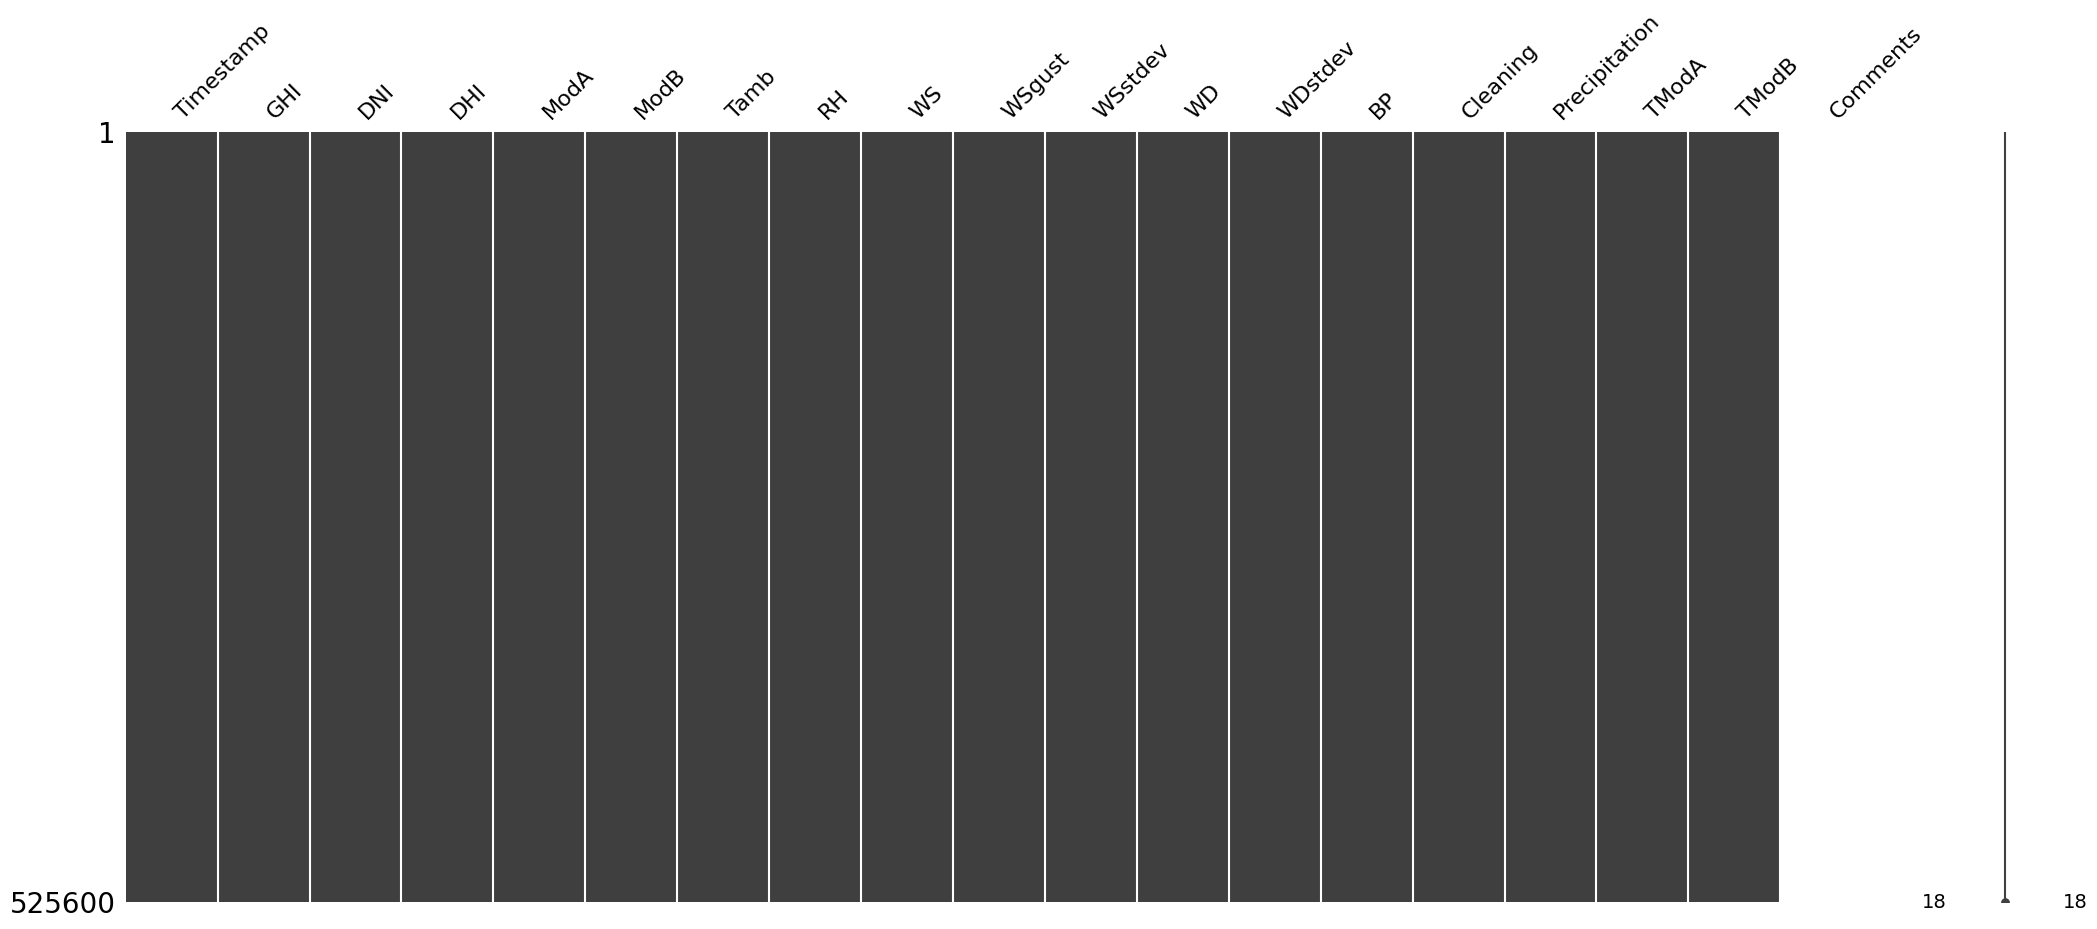

In [81]:
import missingno as msno
plt.rcParams["figure.figsize"] = [4, 2]
msno.matrix(togo_df)
plt.show()

As you can see from the vissualizer all datasets are not null except the last column(**comments**)since it's white throughout the column, So I would like to drop it for all dataset for now

In [82]:
# Here is numericaly for the datasets of benin,
togo_df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [83]:
# To drop the comments column for all the datasets
togo_df.drop('Comments', axis=1, inplace=True)

Data Redunduncy

In [84]:
duplicated_columns = togo_df.columns[togo_df.columns.duplicated()]
if len(duplicated_columns) > 0:
    print("Duplicated columns:", duplicated_columns)
else:
    print("No duplicated columns found for benin datasets.")

No duplicated columns found for benin datasets.


In [85]:
duplicated_rows = togo_df[togo_df.duplicated()]
if not duplicated_rows.empty:
    print("Duplicated rows:")
    print(duplicated_rows)
else:
    print("No duplicated rows found for Benin datasets.")

No duplicated rows found for Benin datasets.


### **Feature Understanding**

In [86]:
# Exploring Unique values
togo_df.nunique()

Timestamp        525600
GHI                8633
DNI                9612
DHI                6841
ModA              10672
ModB               8439
Tamb                266
RH                  966
WS                  143
WSgust              156
WSstdev              44
WD                 3601
WDstdev             614
BP                   16
Cleaning              2
Precipitation        22
TModA               564
TModB               769
dtype: int64

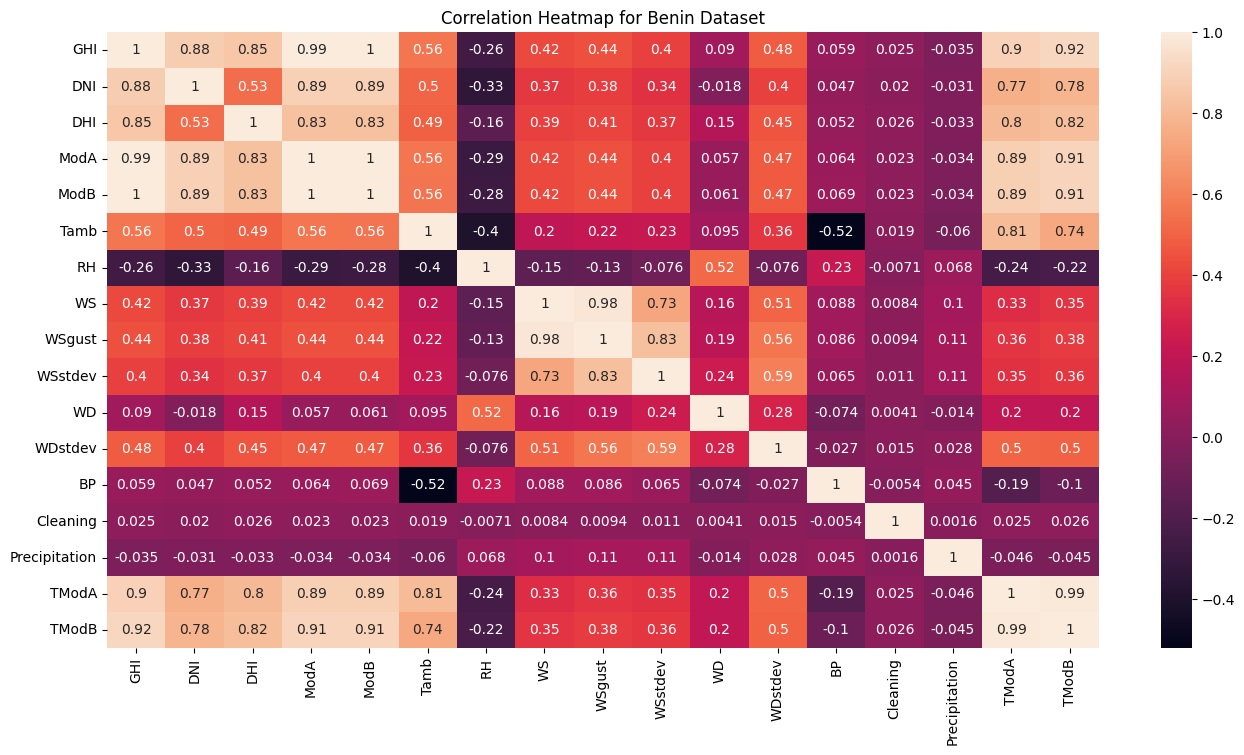

In [87]:
# Visuallizing correlation with heatmaps

# Select only numeric columns for correlation calculation
numeric_togo_df = togo_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(16, 8))
sns.heatmap(numeric_togo_df.corr(), annot=True)
plt.title('Correlation Heatmap for Benin Dataset')
plt.show()

The correlation coefficient is a value between -1 and 1 which indicates the strength and direction of the relationship between two feature from our columns. So A value close to 1(white) indicates close relationship, a value close to -1 indicates a strong negative relationship, a value close to zero represent no relationship.

**Identifying Outliers with Box Plots**

Box plots are a great way to identify outliers in your data. An outlier is a value that is significantly different from the other values.

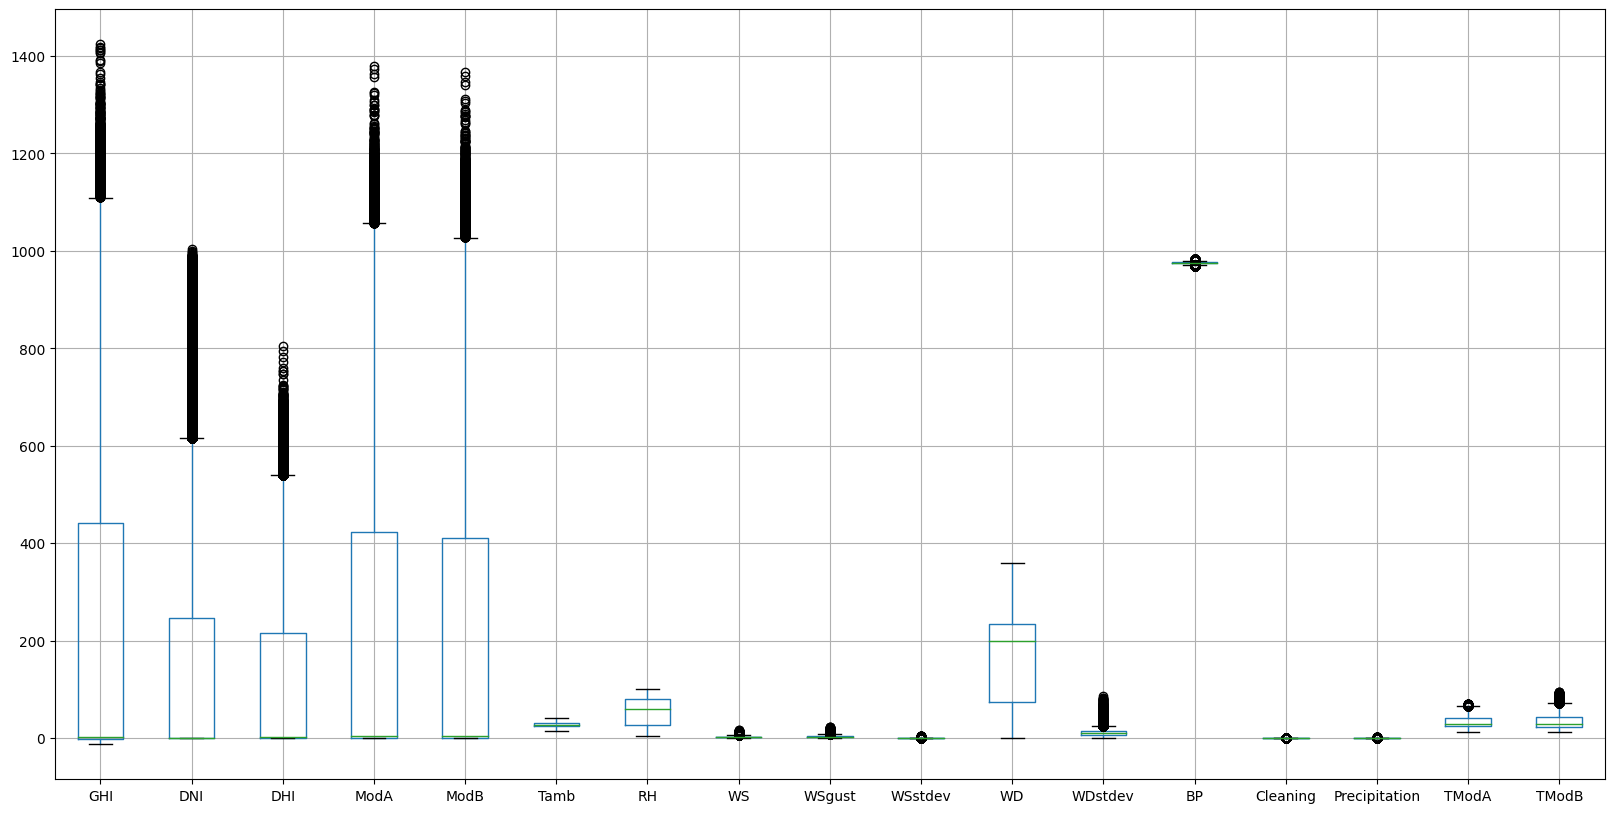

In [88]:
plt.rcParams["figure.figsize"] = [6, 3]  # Width, Height in inches
togo_df.boxplot(figsize=(20, 10))
plt.show()

The box in each box plot represents the interquartile range (the range between the 25th and 75th percentiles), the line inside the box represents the median, and the dots outside the box represent outliers.

In [89]:
# List of columns to replace outliers with zero
replace_with_zero_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'WD', 'WDstdev']

# List of columns to replace outliers with the median
replace_with_median_columns = ['Tamb', 'RH']

# Iterate over the columns of the DataFrame & Calculate the IQR (Interquartile Range)
for column in togo_df.columns:
    if column == 'Timestamp':
        continue

    Q1 = togo_df[column].quantile(0.25)
    Q3 = togo_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if there are any outliers in the column
    outliers = (togo_df[column] < lower_bound) | (togo_df[column] > upper_bound)
    print(f"Number of outliers in {column}: {outliers.sum()}")
    # Calculate the median of the column
    column_median = togo_df[column].median()

    # Replace outliers with the median
    togo_df[column] = np.where(outliers, column_median, togo_df[column])
    # Check if there are any remaining outliers
    outliers = (togo_df[column] < lower_bound) | (togo_df[column] > upper_bound)  # Recalculate outliers after replacement
    print(f"Number of outliers in {column} after replacement: {outliers.sum()}")
    print()

Number of outliers in GHI: 1303
Number of outliers in GHI after replacement: 0

Number of outliers in DNI: 50586
Number of outliers in DNI after replacement: 0

Number of outliers in DHI: 7905
Number of outliers in DHI after replacement: 0

Number of outliers in ModA: 1237
Number of outliers in ModA after replacement: 0

Number of outliers in ModB: 1537
Number of outliers in ModB after replacement: 0

Number of outliers in Tamb: 0
Number of outliers in Tamb after replacement: 0

Number of outliers in RH: 0
Number of outliers in RH after replacement: 0

Number of outliers in WS: 8708
Number of outliers in WS after replacement: 0

Number of outliers in WSgust: 7377
Number of outliers in WSgust after replacement: 0

Number of outliers in WSstdev: 14669
Number of outliers in WSstdev after replacement: 0

Number of outliers in WD: 0
Number of outliers in WD after replacement: 0

Number of outliers in WDstdev: 6921
Number of outliers in WDstdev after replacement: 0

Number of outliers in BP:

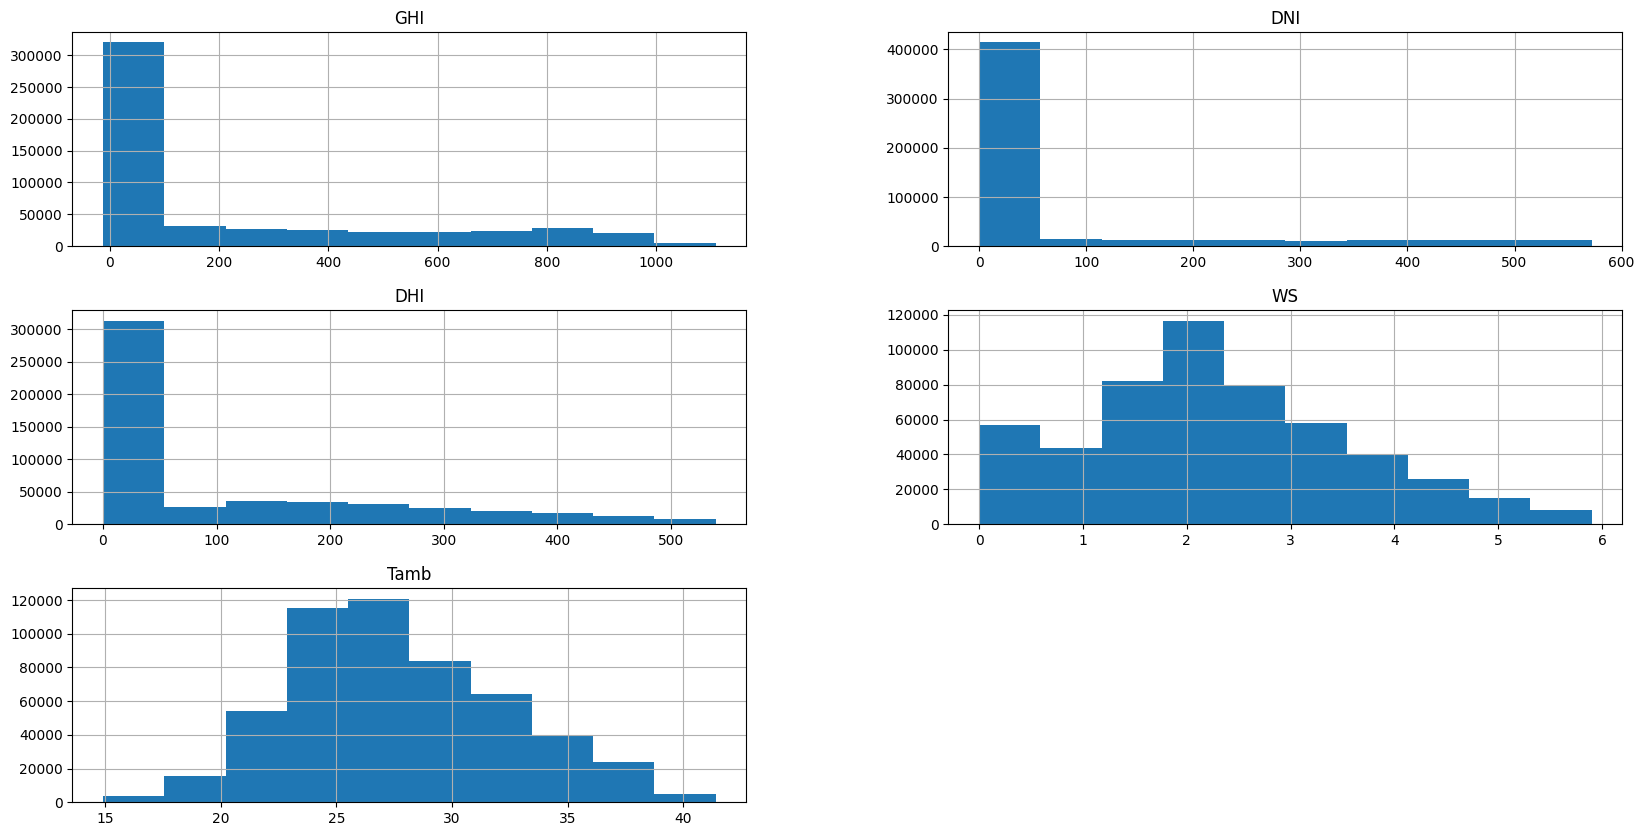

In [91]:
# Histogram
togo_df[["GHI", "DNI", "DHI", "WS", "Tamb"]].hist(figsize=(20, 10))
plt.show()

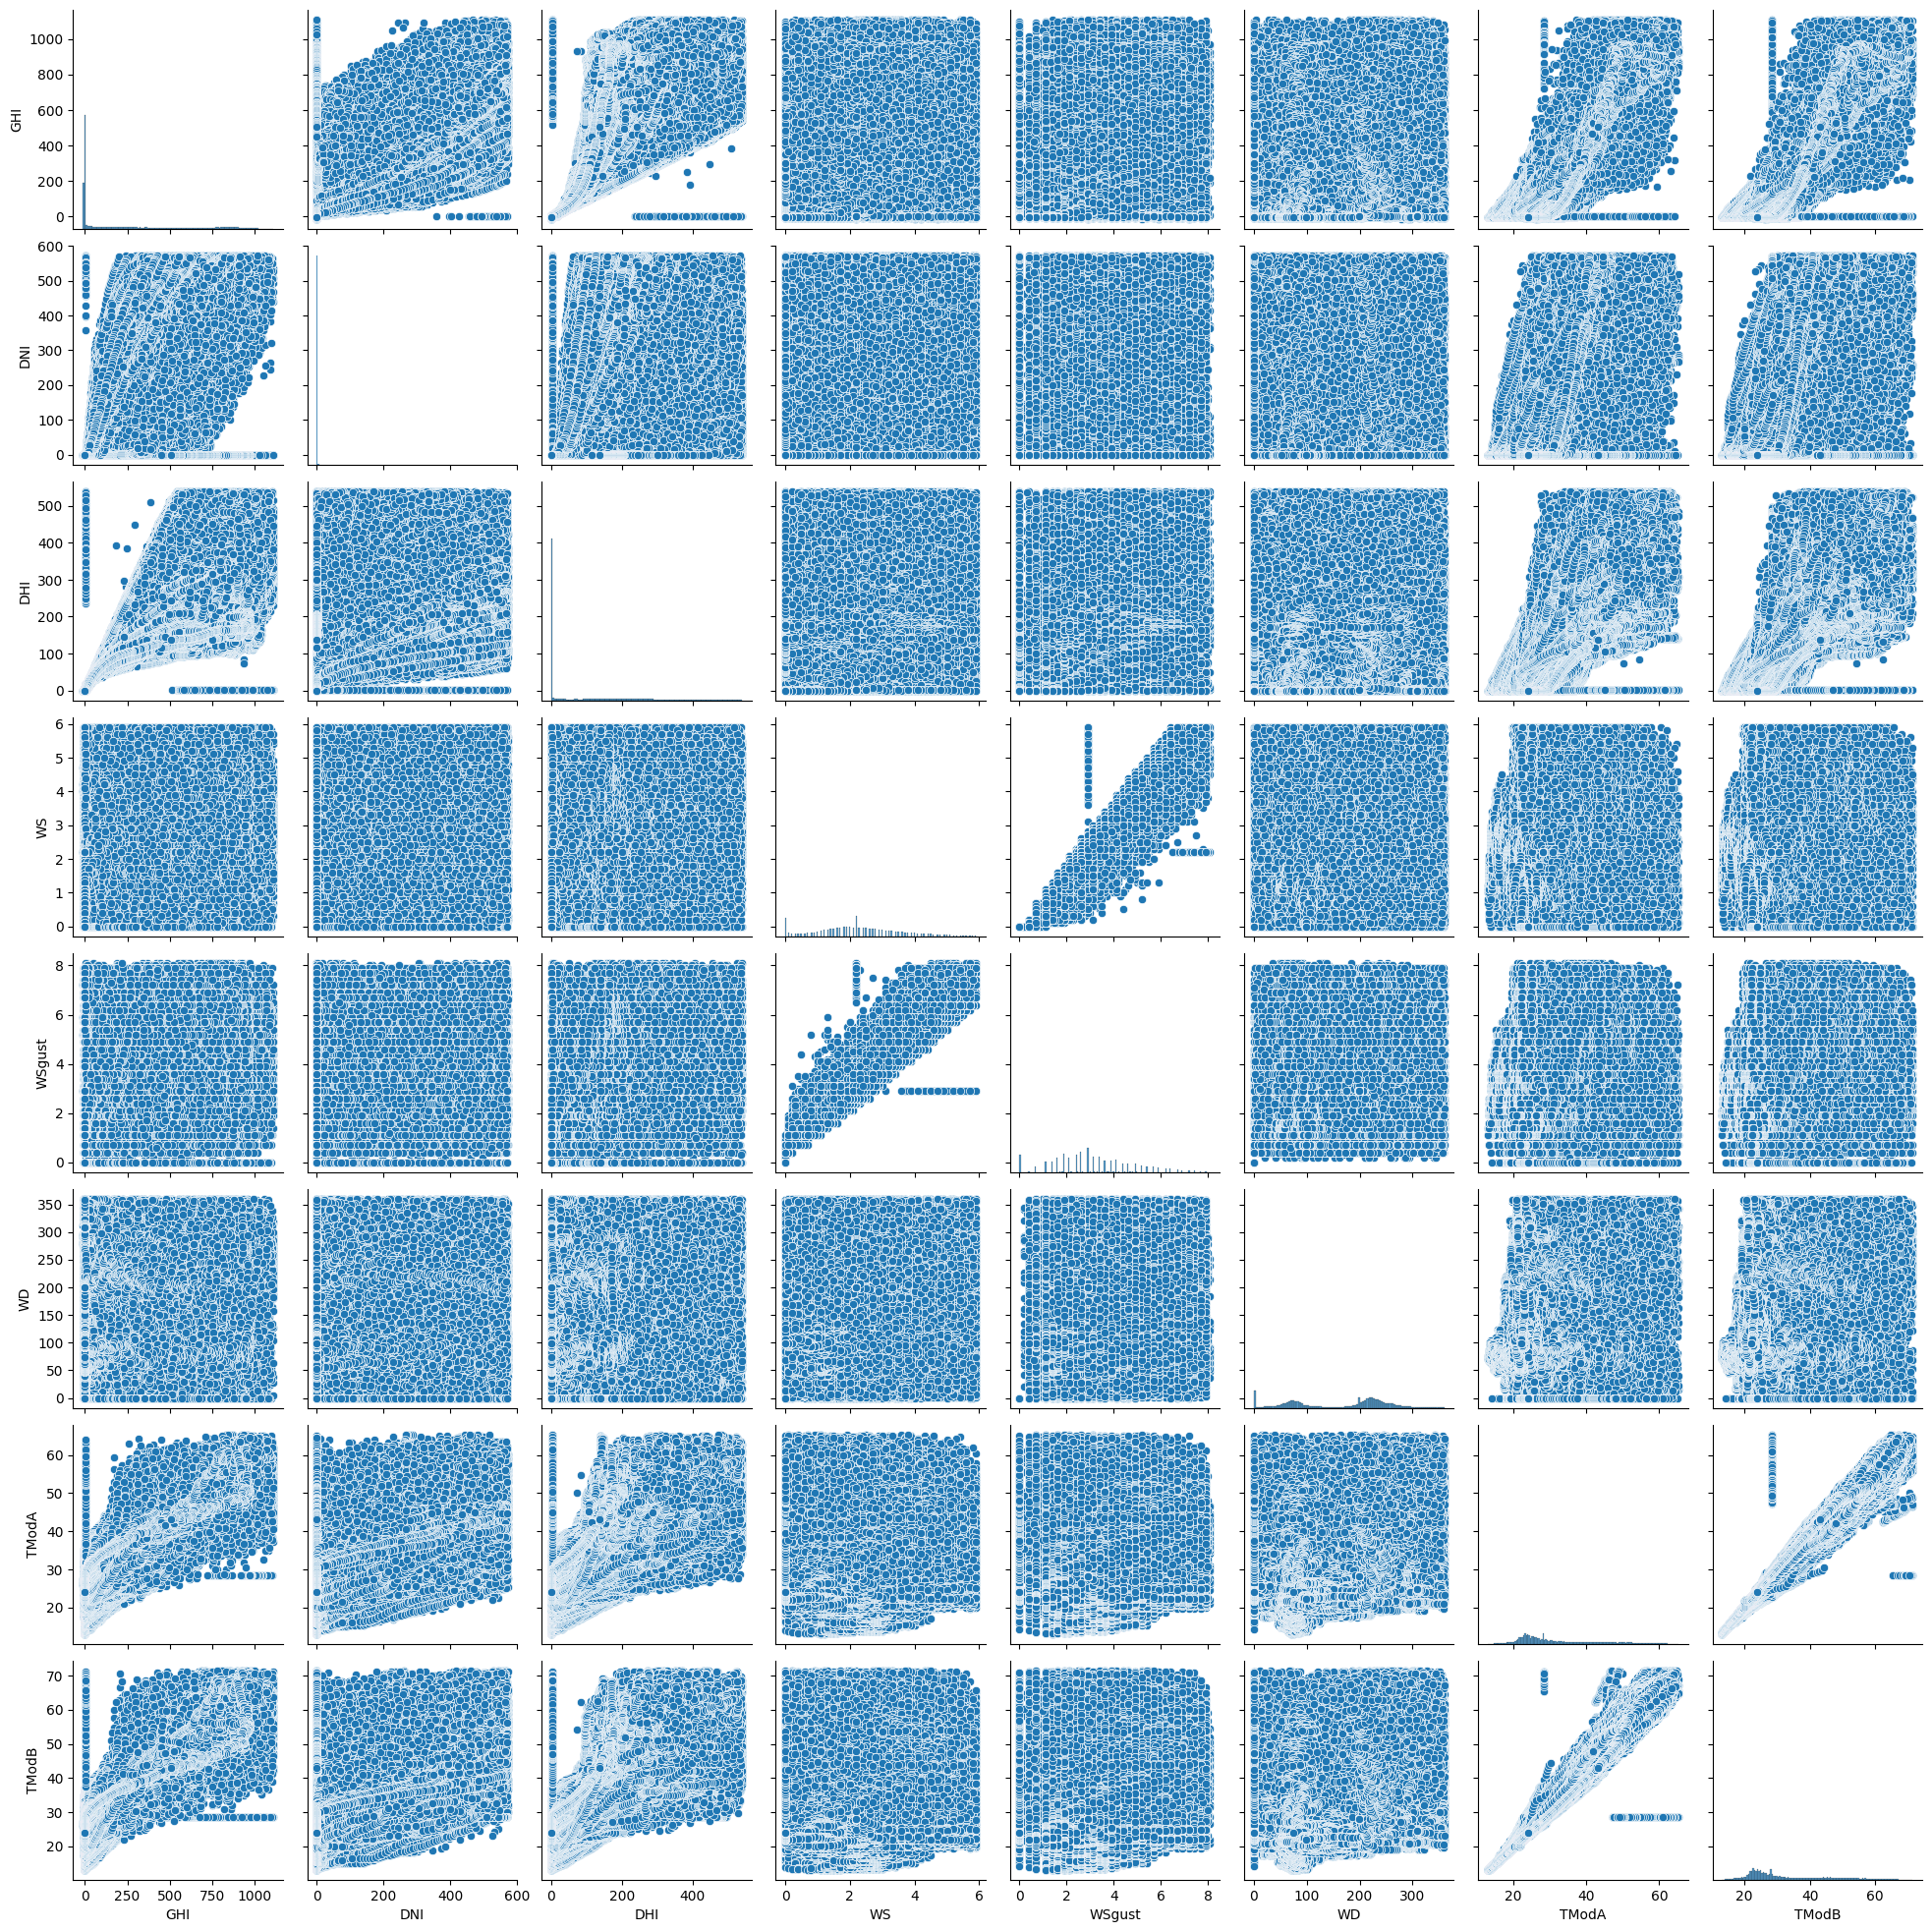

In [92]:
# Subset the data to include wind conditions and solar irradiance
subset_df = togo_df[["GHI", "DNI", "DHI", "WS", "WSgust", "WD", "TModA", "TModB"]]

# Generate a scatter plot matrix
sns.pairplot(subset_df)
plt.show()

In [94]:
togo_df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

 **Time Series of Solar Irradiance and Ambient Temperature**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


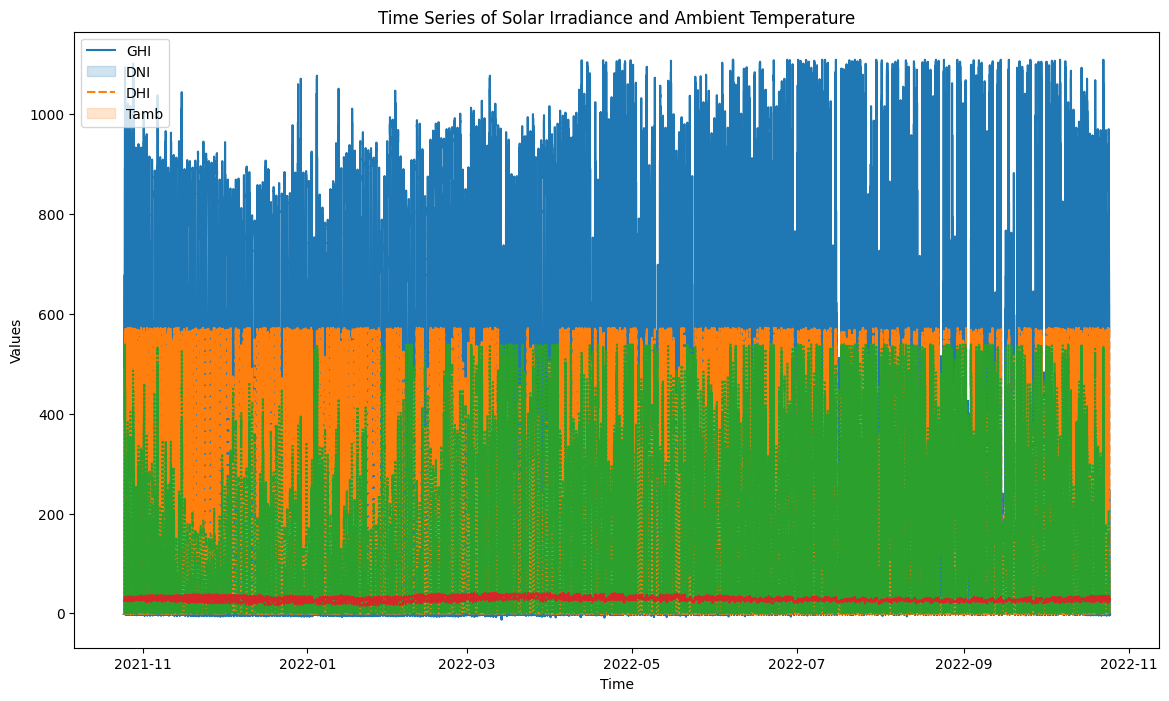

In [95]:
# Ensure 'Timestamp' is in datetime format
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])

# Set 'Timestamp' as the index
togo_df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=togo_df[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Time Series of Solar Irradiance and Ambient Temperature')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['GHI', 'DNI', 'DHI', 'Tamb'])
plt.show()

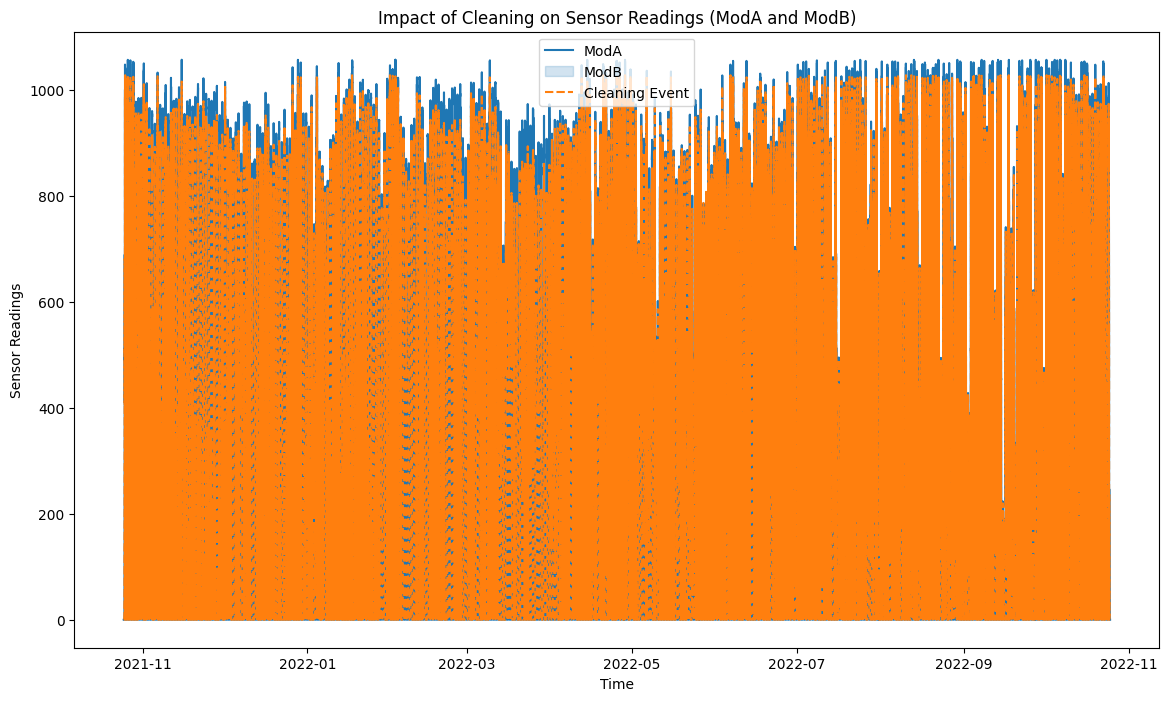

In [96]:
# Plot ModA and ModB over time with cleaning events highlighted
plt.figure(figsize=(14, 8))

# Plot ModA and ModB
sns.lineplot(data=togo_df[['ModA', 'ModB']], palette='tab10')

# Highlight cleaning events
cleaning_events = togo_df[togo_df['Cleaning'] == 1].index
for event in cleaning_events:
    plt.axvline(x=event, color='red', linestyle='--', alpha=0.5)

plt.title('Impact of Cleaning on Sensor Readings (ModA and ModB)')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend(['ModA', 'ModB', 'Cleaning Event'])
plt.show()

**Wind Direction Distribution(Polar Histogram)**

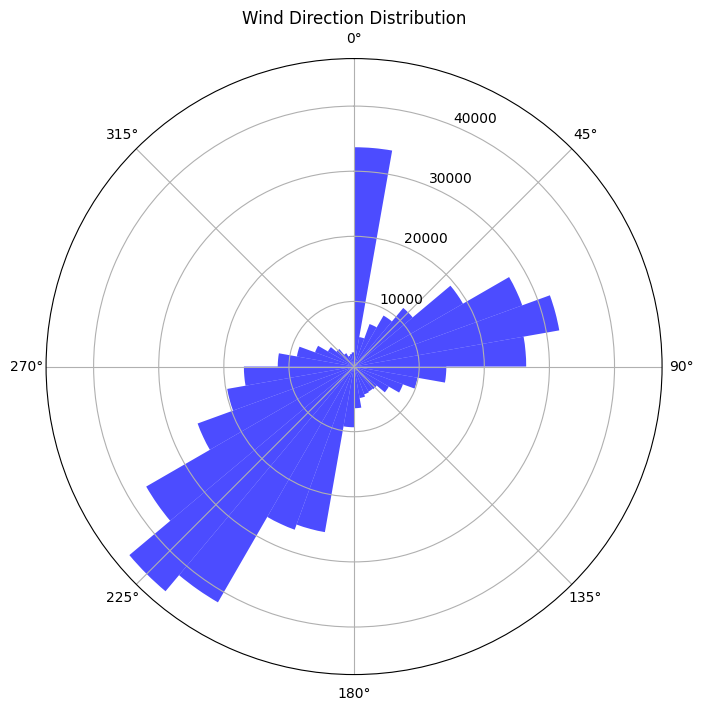

In [97]:
# Convert wind direction from degrees to radians
togo_df['WD_rad'] = np.deg2rad(togo_df['WD'])

# Create a polar histogram for wind direction
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(togo_df['WD_rad'], bins=36, color='blue', alpha=0.7)
ax.set_theta_zero_location('N')  # Set the start to North
ax.set_theta_direction(-1)  # Set the direction clockwise

plt.title('Wind Direction Distribution')
plt.show()

**Wind Speed vs. Wind Direction(Polar Scatter Plot)**

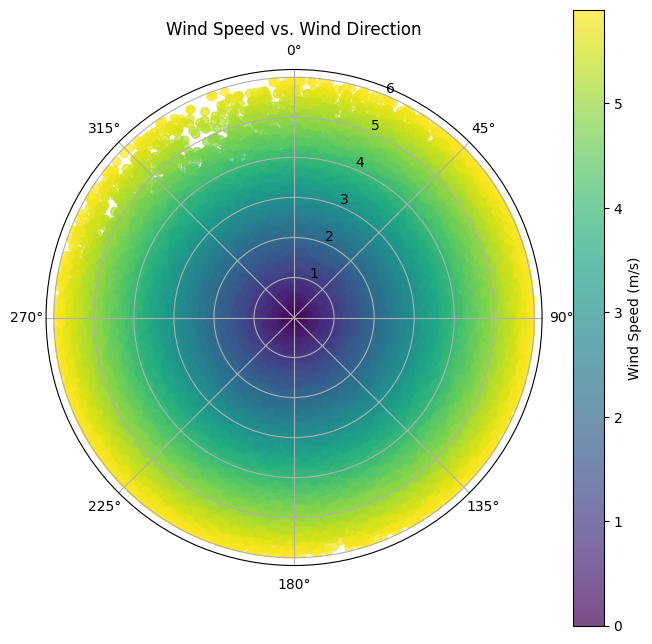

In [98]:
# Create a polar scatter plot for wind speed and direction
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
sc = ax.scatter(togo_df['WD_rad'], togo_df['WS'], c=togo_df['WS'], cmap='viridis', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Add color bar for wind speed
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Wind Speed (m/s)')

plt.title('Wind Speed vs. Wind Direction')
plt.show()

**Wind Direction Variability**

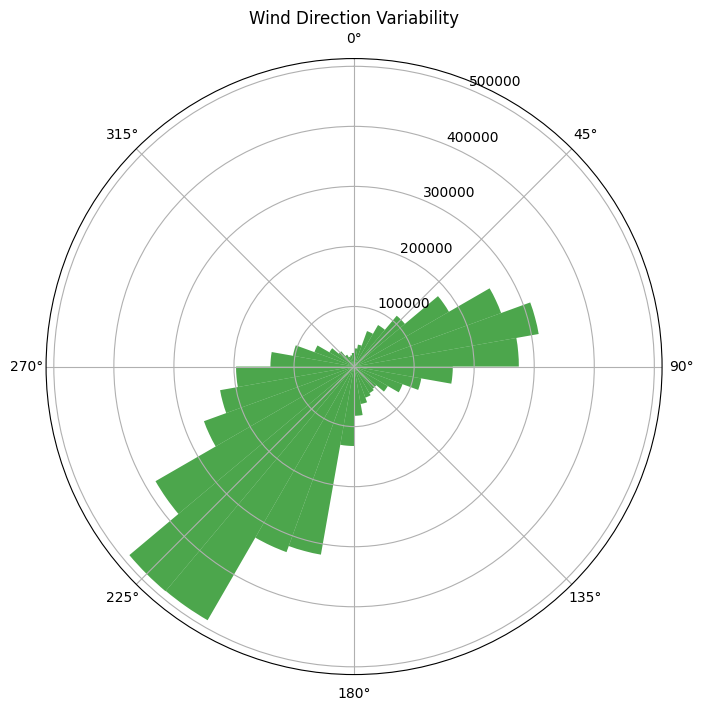

In [99]:
# Convert the standard deviation of wind direction to radians
togo_df['WDstdev_rad'] = np.deg2rad(togo_df['WDstdev'])

# Create a polar plot for wind direction variability
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(togo_df['WD_rad'], weights=togo_df['WDstdev'], bins=36, color='green', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Wind Direction Variability')
plt.show()

**The Influence of RH on Temperature and Solar Radiation**

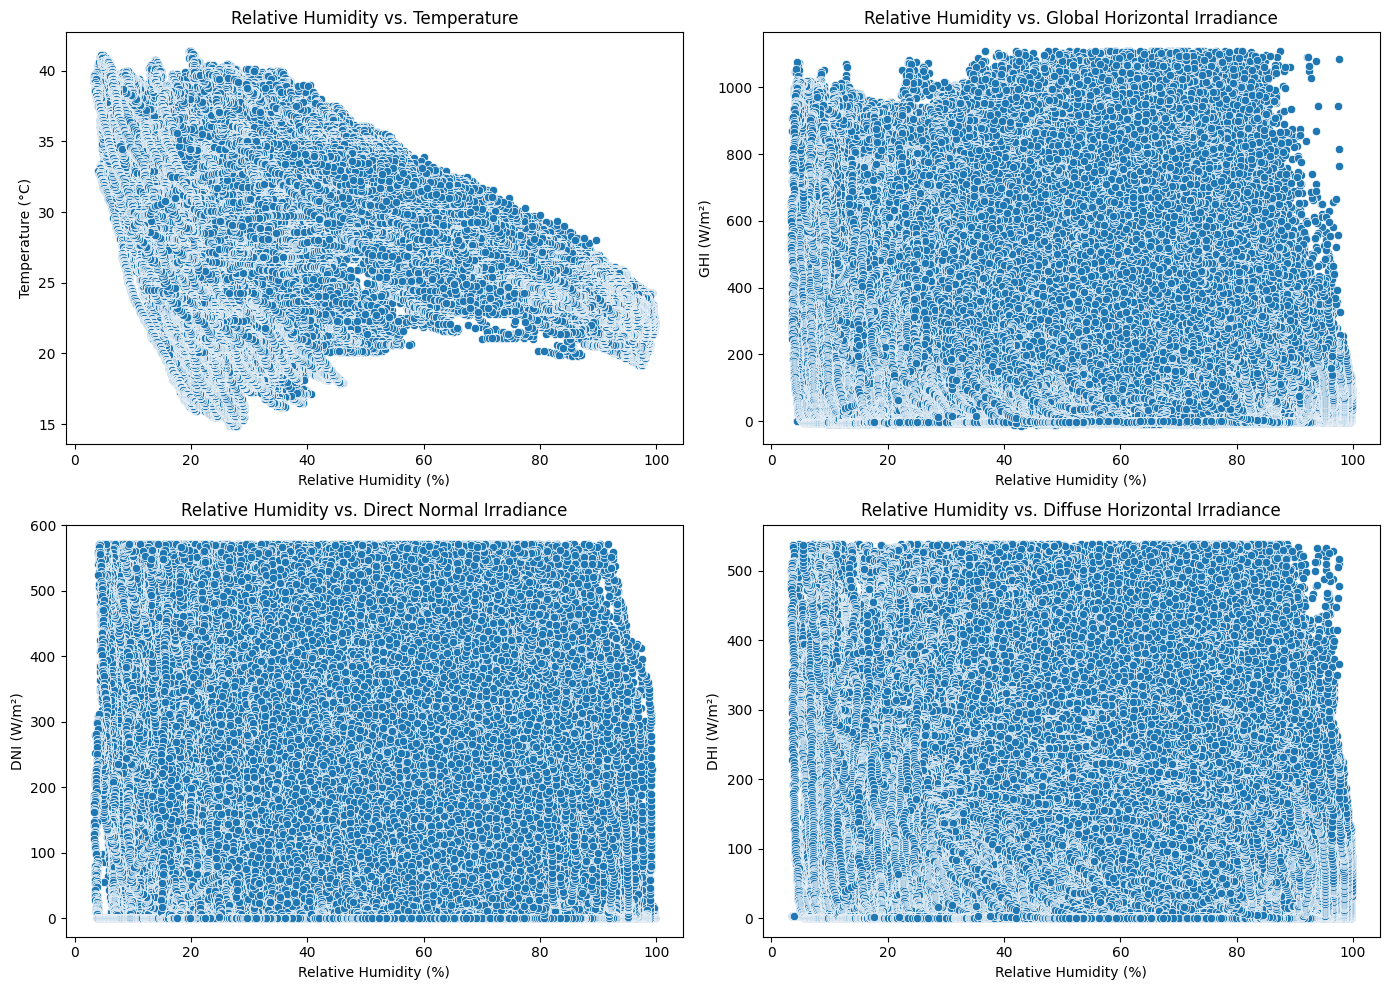

In [100]:
# Set up the figure and axes for multiple scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for RH vs. Temperature (Tamb)
sns.scatterplot(x='RH', y='Tamb', data=togo_df, ax=axs[0, 0])
axs[0, 0].set_title('Relative Humidity vs. Temperature')
axs[0, 0].set_xlabel('Relative Humidity (%)')
axs[0, 0].set_ylabel('Temperature (°C)')

# Scatter plot for RH vs. Global Horizontal Irradiance (GHI)
sns.scatterplot(x='RH', y='GHI', data=togo_df, ax=axs[0, 1])
axs[0, 1].set_title('Relative Humidity vs. Global Horizontal Irradiance')
axs[0, 1].set_xlabel('Relative Humidity (%)')
axs[0, 1].set_ylabel('GHI (W/m²)')

# Scatter plot for RH vs. Direct Normal Irradiance (DNI)
sns.scatterplot(x='RH', y='DNI', data=togo_df, ax=axs[1, 0])
axs[1, 0].set_title('Relative Humidity vs. Direct Normal Irradiance')
axs[1, 0].set_xlabel('Relative Humidity (%)')
axs[1, 0].set_ylabel('DNI (W/m²)')

# Scatter plot for RH vs. Diffuse Horizontal Irradiance (DHI)
sns.scatterplot(x='RH', y='DHI', data=togo_df, ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity vs. Diffuse Horizontal Irradiance')
axs[1, 1].set_xlabel('Relative Humidity (%)')
axs[1, 1].set_ylabel('DHI (W/m²)')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

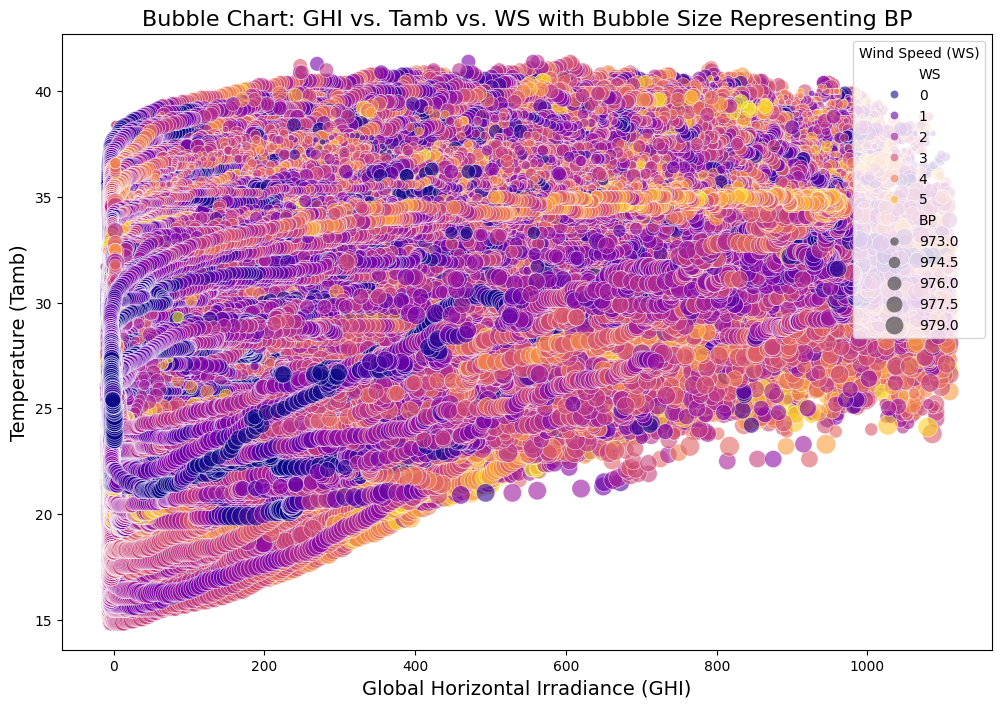

In [101]:
# Create a bubble chart
plt.figure(figsize=(12, 8))

# Scatter plot with bubble size representing BP
bubble_chart = sns.scatterplot(
    x='GHI',
    y='Tamb',
    size='BP',  # Bubble size based on Barometric Pressure (BP)
    hue='WS',   # Color based on Wind Speed (WS)
    sizes=(20, 200),  # Size range for the bubbles
    data=togo_df,
    alpha=0.6,
    palette="plasma"  # Color palette for the wind speed
)

# Set titles and labels
bubble_chart.set_title('Bubble Chart: GHI vs. Tamb vs. WS with Bubble Size Representing BP', fontsize=16)
bubble_chart.set_xlabel('Global Horizontal Irradiance (GHI)', fontsize=14)
bubble_chart.set_ylabel('Temperature (Tamb)', fontsize=14)

# Adjust legend
plt.legend(loc='upper right', title='Wind Speed (WS)')
plt.show()